In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
# read in sentence file (the sentence file should be in data folder 'Cleanedsentence')
sentence= pd.read_csv('../sentence.csv', encoding='utf8')
sentence=sentence['sentence']


In [192]:
def readfile(path):
    fp = open(path, "r", encoding='utf8', errors='ignore')
    content = fp.read()
    fp.close()
    return content


def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords

In [337]:
#import adjusted stopwords list
stopwords=stopwordslist('stopwordsCN.txt')

In [331]:
stopwords

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '一',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一个',
 '滴',
 '一旦',
 '一来',
 '一样',
 '一般',
 '一转眼',
 '万一',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '也',
 '也好',
 '也罢',
 '了',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为'

In [194]:
#nlp chinese word clustering topic study
import re
import jieba
import jieba.analyse
import codecs
import nltk
import numpy
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

## sentence preparation

In [195]:
sentenseList=list(sentense)

In [263]:
len(sentenseList)

8341

In [196]:
sentenseList

['我是世纪佳缘手机版用户我的世界总是很安静静得都能听见自己的心跳和呼吸独自行走独自唱歌独自逛街独自看着一整个世界狂欢我羡慕那些手拉手逛公园的情侣我妒忌那些捧着爆米花在影院出双入对的爱人',
 '福兮祸之所伏祸兮福之所倚大可不必太在意人生历程的潮涨潮落只要悟透了其中的禅机便会豁然开朗生命也有保质期想做的事该趁早去做如果你只是把你的心愿慎重地供奉在心里却未曾去履行',
 '我是世纪佳缘手机版用户你知道表为什么是圆的吗因为每次到头了它都能再重新开始可惜的是我们的人生不是圆的我们的生活是不能真正的从头开始的所以我很珍惜自己生命中的每一个过客在佳缘我希望自',
 '命运带给每个人截然不同的经历无论是艰辛痛苦或是潸然泪下都是促使人成长的使然随着时间的打磨让我改去了个性学会了随性忘有缘人放慢你的节拍和脚步我想找到一位能和我相依相偎且能共同成长打造人生的人',
 '爱一个人意味着什么呢这意味着为他的幸福而高兴为使他能够幸福而去做需要做的一切并从这当中得到快乐一般的宿命就是我们总会遇见一些人遭遇一些事然后看着命中注定的事发生却无能为力而我的宿命',
 '当我的人生路开始曲曲折折是否你也曾有相同经历当“你什么都不差只差一个我”的时候当“我什么都不缺只缺一个你”的时候是否我们还可以相遇',
 '一棵充塞宇宙的大树无边无际星星是它的果实可它的树干在哪里向西行去攀那根天柱也许它这棵大树的树干我想你一定能攀上这棵大树安坐枝杈间饕餮蜜桃你如同西部璀璨的星空长久地闪亮我心底我常在梦中回返像从浊世重登',
 '缘起缘灭缘浓缘淡缘深缘浅不是我们能够控制的但我们能做到的是在因缘际会的时侯好好的把握和珍惜我是世纪佳缘手机版用户我选择在佳缘谱写我的缘分篇章因为我相信那妙不可言的缘分定会在这里指引我找到适合自己的爱人',
 '于千万人之中遇见我要遇见的人于千万年之中时间无涯的荒野里没有早一步也没有迟一步遇上了也只能轻轻地说一句：“哦你也在这里吗”我是世纪佳缘手机版用户期待着在佳缘能够遇见你那时那刻我',
 '爱情终究是缘分茫茫人海两个人的相识相爱本身就是一种巧合你会是我的那个巧合吗',
 '我是一个简单的人我有些特长：过目不忘不挑食是不是很有趣呢我的工作属于IT业',
 '涐很努力ｄ偽裝咱巳沒想到還是被祂看出來了',
 '关于外貌简单形容就是中等身材我的工作属于医务工作者我生长在一个单亲家庭我爱我家人他们也

In [197]:
cleanups = []
for token in sentenseList:
    cleanup = []
    words_list = token
    for word in words_list:
        if word not in stopwords:
                cleanup.append(word)
    cleanups.append(cleanup)

In [220]:
tokenList=[]
for i in sentenseList:
    i=jieba.lcut_for_search(i)
    if i not in stopwords:
        tokenList.append(i)

In [223]:
sentenseList

['我是世纪佳缘手机版用户我的世界总是很安静静得都能听见自己的心跳和呼吸独自行走独自唱歌独自逛街独自看着一整个世界狂欢我羡慕那些手拉手逛公园的情侣我妒忌那些捧着爆米花在影院出双入对的爱人',
 '福兮祸之所伏祸兮福之所倚大可不必太在意人生历程的潮涨潮落只要悟透了其中的禅机便会豁然开朗生命也有保质期想做的事该趁早去做如果你只是把你的心愿慎重地供奉在心里却未曾去履行',
 '我是世纪佳缘手机版用户你知道表为什么是圆的吗因为每次到头了它都能再重新开始可惜的是我们的人生不是圆的我们的生活是不能真正的从头开始的所以我很珍惜自己生命中的每一个过客在佳缘我希望自',
 '命运带给每个人截然不同的经历无论是艰辛痛苦或是潸然泪下都是促使人成长的使然随着时间的打磨让我改去了个性学会了随性忘有缘人放慢你的节拍和脚步我想找到一位能和我相依相偎且能共同成长打造人生的人',
 '爱一个人意味着什么呢这意味着为他的幸福而高兴为使他能够幸福而去做需要做的一切并从这当中得到快乐一般的宿命就是我们总会遇见一些人遭遇一些事然后看着命中注定的事发生却无能为力而我的宿命',
 '当我的人生路开始曲曲折折是否你也曾有相同经历当“你什么都不差只差一个我”的时候当“我什么都不缺只缺一个你”的时候是否我们还可以相遇',
 '一棵充塞宇宙的大树无边无际星星是它的果实可它的树干在哪里向西行去攀那根天柱也许它这棵大树的树干我想你一定能攀上这棵大树安坐枝杈间饕餮蜜桃你如同西部璀璨的星空长久地闪亮我心底我常在梦中回返像从浊世重登',
 '缘起缘灭缘浓缘淡缘深缘浅不是我们能够控制的但我们能做到的是在因缘际会的时侯好好的把握和珍惜我是世纪佳缘手机版用户我选择在佳缘谱写我的缘分篇章因为我相信那妙不可言的缘分定会在这里指引我找到适合自己的爱人',
 '于千万人之中遇见我要遇见的人于千万年之中时间无涯的荒野里没有早一步也没有迟一步遇上了也只能轻轻地说一句：“哦你也在这里吗”我是世纪佳缘手机版用户期待着在佳缘能够遇见你那时那刻我',
 '爱情终究是缘分茫茫人海两个人的相识相爱本身就是一种巧合你会是我的那个巧合吗',
 '我是一个简单的人我有些特长：过目不忘不挑食是不是很有趣呢我的工作属于IT业',
 '涐很努力ｄ偽裝咱巳沒想到還是被祂看出來了',
 '关于外貌简单形容就是中等身材我的工作属于医务工作者我生长在一个单亲家庭我爱我家人他们也

In [338]:
#tokenize each sentense while maintaining the list structure
cleaned_token_sentence_list=[]
for sentence in sentenseList:
    tokened_sentence = jieba.lcut_for_search(sentence)
    cleaned_token_sentence = []
    for tokened_word in tokened_sentence:
        if tokened_word not in stopwords:
            cleaned_token_sentence.append(tokened_word)
    cleaned_token_sentence_list.append(cleaned_token_sentence)

In [339]:
cleaned_token_sentence_list

[['世纪',
  '佳缘',
  '手机',
  '版',
  '用户',
  '世界',
  '总是',
  '安静',
  '静得',
  '听见',
  '心跳',
  '呼吸',
  '独自',
  '行走',
  '独自',
  '唱歌',
  '独自',
  '逛街',
  '独自',
  '看着',
  '整个',
  '世界',
  '狂欢',
  '羡慕',
  '手拉',
  '拉手',
  '手拉手',
  '公园',
  '逛公园',
  '情侣',
  '妒忌',
  '捧',
  '爆米花',
  '影院',
  '出双入对',
  '爱人'],
 ['福兮祸',
  '所伏',
  '祸兮福',
  '倚',
  '可不',
  '不必',
  '大可不必',
  '太',
  '在意',
  '人生',
  '历程',
  '涨潮',
  '潮落',
  '潮涨潮',
  '潮涨潮落',
  '悟',
  '透',
  '禅机',
  '便会',
  '豁然',
  '开朗',
  '豁然开朗',
  '生命',
  '保质',
  '保质期',
  '想',
  '做',
  '事该',
  '趁早',
  '做',
  '心愿',
  '慎重',
  '供奉',
  '心里',
  '未曾',
  '履行'],
 ['世纪',
  '佳缘',
  '手机',
  '版',
  '用户',
  '知道',
  '表',
  '圆',
  '每次',
  '到头',
  '重新',
  '可惜',
  '人生',
  '圆',
  '生活',
  '不能',
  '真正',
  '从头',
  '从头开始',
  '珍惜',
  '生命',
  '中',
  '过客',
  '佳缘',
  '希望'],
 ['命运',
  '带给',
  '每个',
  '截然',
  '不同',
  '截然不同',
  '经历',
  '无论是',
  '艰辛',
  '痛苦',
  '潸然',
  '潸然泪下',
  '促使',
  '成长',
  '使然',
  '时间',
  '打磨',
  '改去',
  '个性',
  '学会',
  '随性',
  '忘',
  '有缘',
  '有缘人',
  '放慢',
  '节拍',
  '脚步

In [334]:
len(cleaned_token_sentence_list)

8341

In [120]:
#creating and counting the words subset
subWords=[]
for i in tokenList:
    for j in i:
        if s not in stopwords:
            subWords.append(s)

In [290]:
len(subWords)

482172

/Users/shu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['STKaiti'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


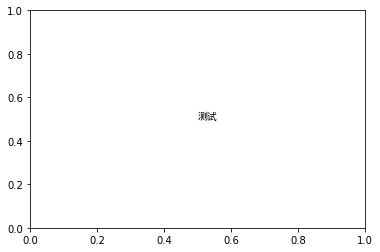

In [291]:
# a bit testing for printing out chinese character in matplot
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt

font_path = "chineseFont/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)
plt.text(0.5, 0.5, s=u'测试', fontproperties=prop)
plt.show()

## Wordcloud plot by word frequency

In [322]:
#change the value in return to set the single color need, in RGB format.
def re_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("rgb(235,122,119)") 

In [340]:
from wordcloud import WordCloud
import nltk
# from nltk.corpus import stopwords 

#remove the stopword and set the wordcloud counted by frequncy 
w2 = WordCloud(width=720, height=380,font_path = "chineseFont/SimHei.ttf",stopwords=stopwords, background_color='black',max_words=200,collocations=False)

w2.generate(str(cleaned_token_sentence_list))


# w2.generate(" ".join(list(allWords)))

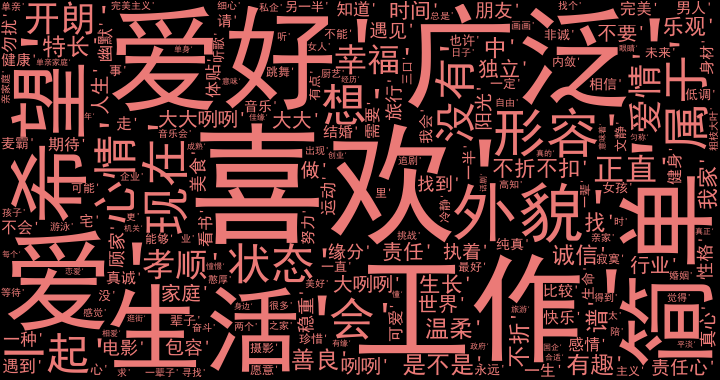

In [341]:
w2.recolor(color_func = re_color_func)
w2.to_image()

## Word2Vec Clustering

In [201]:
import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec
from gensim.models import Phrases
import logging

In [202]:
import nltk
from nltk.util import ngrams
import gensim.models.word2vec as w2v
from gensim.models import Phrases
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.externals import joblib
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [203]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

In [204]:
#can play with the figure to adjust the dimension
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words


In [241]:
#building w2v model
model1= word2vec.Word2Vec(cleaned_token_sentence_list, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

2018-08-25 22:05:46,627 : INFO : collecting all words and their counts
2018-08-25 22:05:46,634 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-08-25 22:05:46,696 : INFO : collected 15820 word types from a corpus of 129382 raw words and 8341 sentences
2018-08-25 22:05:46,697 : INFO : Loading a fresh vocabulary
2018-08-25 22:05:46,709 : INFO : min_count=40 retains 495 unique words (3% of original 15820, drops 15325)
2018-08-25 22:05:46,711 : INFO : min_count=40 leaves 80121 word corpus (61% of original 129382, drops 49261)
2018-08-25 22:05:46,715 : INFO : deleting the raw counts dictionary of 15820 items
2018-08-25 22:05:46,718 : INFO : sample=0.001 downsamples 84 most-common words
2018-08-25 22:05:46,720 : INFO : downsampling leaves estimated 56512 word corpus (70.5% of prior 80121)
2018-08-25 22:05:46,723 : INFO : estimated required memory for 495 words and 300 dimensions: 1435500 bytes
2018-08-25 22:05:46,727 : INFO : resetting layer weights
2018-08-25 

In [260]:
#testing1
model1.most_similar("结婚")

/Users/shu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('勿扰', 0.9642781019210815),
 ('平淡', 0.9385370016098022),
 ('非诚', 0.9359334707260132),
 ('中', 0.8993328809738159),
 ('缘分', 0.8936727643013),
 ('努力', 0.8924448490142822),
 ('淡淡', 0.891290009021759),
 ('平平淡淡', 0.8824558258056641),
 ('生活', 0.8707009553909302),
 ('平平', 0.8647880554199219)]

In [262]:
#testing2
model1.most_similar("家庭")

/Users/shu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('我家', 0.9864910244941711),
 ('单亲家庭', 0.9763586521148682),
 ('之家', 0.9746780395507812),
 ('亲家庭', 0.9674779176712036),
 ('高知', 0.9673289060592651),
 ('三口', 0.9624266624450684),
 ('亲家', 0.9595710635185242),
 ('爱', 0.9384495615959167),
 ('单亲', 0.9307824373245239),
 ('生长', 0.9099217653274536)]

In [209]:
import time

In [253]:
#both k-mean and DBSCAN methods are tested here

start = time.time() # Start time

word_vectors = model.wv.syn0
num_clusters = word_vectors.shape[0] / 5

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans(n_clusters = 12)
idx = kmeans_clustering.fit_predict( word_vectors )

# Initalize a DBSCAN object and use it to extract centroids
# DB_clustering = DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’,
#                        leaf_size=30, p=None, n_jobs=1)
# idx_DB = DB_clustering.fit_predict( word_vectors )


# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("time for clustering computation",elapsed)


time for clustering computation 0.4746980667114258


In [254]:
word_centroid_map = dict(zip(model1.wv.index2word, idx ))


In [255]:
#print out word cluster label
word_centroid_map

{'-': 0,
 ';': 7,
 'IT': 11,
 'NBA': 5,
 'TA': 1,
 'ing': 4,
 '一下': 3,
 '一世': 4,
 '一个': 11,
 '一份': 8,
 '一位': 6,
 '一半': 2,
 '一场': 1,
 '一天': 1,
 '一定': 1,
 '一次': 2,
 '一段': 7,
 '一点': 3,
 '一生': 8,
 '一直': 6,
 '一种': 4,
 '一起': 3,
 '一路': 2,
 '一辈': 3,
 '一辈子': 7,
 '一颗': 11,
 '三口': 1,
 '上进': 9,
 '上进心': 1,
 '不了': 4,
 '不会': 9,
 '不再': 8,
 '不到': 11,
 '不可': 11,
 '不同': 11,
 '不好': 2,
 '不想': 2,
 '不折': 4,
 '不折不扣': 7,
 '不能': 3,
 '不要': 7,
 '专一': 11,
 '世界': 3,
 '世纪': 9,
 '业': 9,
 '业余': 3,
 '业余时间': 1,
 '东西': 0,
 '两个': 11,
 '两杯': 7,
 '个人': 1,
 '中': 1,
 '中等': 3,
 '主义': 6,
 '之中': 6,
 '之前': 11,
 '之家': 8,
 '之间': 11,
 '乐观': 6,
 '也许': 6,
 '习惯': 11,
 '了解': 4,
 '事': 6,
 '事业': 11,
 '事情': 11,
 '互相': 11,
 '享受': 4,
 '亲家': 1,
 '亲家庭': 9,
 '人味': 11,
 '人心': 2,
 '人海': 3,
 '人生': 4,
 '今生': 11,
 '付出': 6,
 '以后': 3,
 '企业': 4,
 '会': 3,
 '伤害': 4,
 '伴侣': 3,
 '低调': 2,
 '体贴': 4,
 '余生': 2,
 '作者': 1,
 '佳缘': 10,
 '依然': 11,
 '信息': 2,
 '值得': 11,
 '做': 4,
 '健康': 8,
 '健身': 5,
 '偶尔': 3,
 '充满': 3,
 '公务': 0,
 '公务员': 1,
 '共同': 4,
 '共度': 4,
 '关心': 1

In [256]:
# For the first 10 clusters
for cluster in range(0,12):
    # Print the cluster number  
    print ("\nCluster %d" % cluster)
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in range(0,len(word_centroid_map.values())):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print (words)
    
dict(zip(names, d.values()))



Cluster 0
['设计', '知名', '东西', '～', '公务', '-', '好好', '只想', '命中注定', '潮']

Cluster 1
['广泛', '简单', '心情', '孝顺', '中', '善良', '谱', '温柔', '生长', '大大', '咧咧', '大咧咧', '大大咧咧', '遇见', '阳光', '稳重', '美食', '性格', '真心', '遇到', '知道', '需要', '请', '音乐', '纯真', '一定', '心', '辈子', '跳舞', '三口', '细心', '更', '自由', '音乐会', '听', '奋斗', '等待', '粗枝大叶', '高知', '亲家', '平淡', '有缘', '真的', '经历', '一天', '张扬', '小酌', '特别', '相互', '懂得', '作者', '平时', '自由职业', '曾经', '总会', '个人', '家', 'TA', '看到', '最后', '高大', '平凡', '业余时间', '过去', '苗条', '睡', '公务员', '解救', '茫茫', '分享', '房奴', '一场', '黑', '发生', '感受', '地方', '带', '忘记', '条件', '上进心', '发福', '自我', '积极', '样子', '关心', '男士', '风景']

Cluster 2
['喜欢', '工作', '缘分', '旅行', '电影', '感情', '完美', '走', '一半', '低调', '有点', '珍惜', '冷静', '愿意', '内敛', '完美主义', '美好', '日子', '私企', '憧憬', '创业', '政府', '意味着', '选择', '一次', '想要', '余生', '工作者', '愿', '不想', '金融', '静待', '外企', '晒', '脾气', '娱乐', '稳定', '吃不胖', '美食家', '发现', '挑食', '岁月', '思念', '平平', '微笑', '认真', '钢琴', '无穷', '不好', '信息', '活泼', '问题', '命中', '明天', '梦', '工作狂', '一路', '总有', '热情', '人心', '高管', '离异']

Clust

NameError: name 'names' is not defined

In [38]:
#saving model for future usage
model_name = "test1"
model.save(model_name)
new_model = gensim.models.Word2Vec.load('test1')

2018-08-14 00:22:00,947 : INFO : saving Word2Vec object under test1, separately None
2018-08-14 00:22:00,951 : INFO : not storing attribute syn0norm
2018-08-14 00:22:00,953 : INFO : not storing attribute cum_table
2018-08-14 00:22:01,046 : INFO : saved test1
2018-08-14 00:22:01,048 : INFO : loading Word2Vec object from test1
2018-08-14 00:22:01,111 : INFO : loading wv recursively from test1.wv.* with mmap=None
2018-08-14 00:22:01,113 : INFO : setting ignored attribute syn0norm to None
2018-08-14 00:22:01,115 : INFO : setting ignored attribute cum_table to None
2018-08-14 00:22:01,119 : INFO : loaded test1
